In [7]:
import pandas as pd
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Bidirectional, SpatialDropout1D, Dropout, TimeDistributed
import matplotlib.pyplot as plt

Epoch 1/20
25/25 [==============================] - 9s 288ms/step - loss: 6.6262 - accuracy: 0.8100 - val_loss: 3.0264 - val_accuracy: 0.8735
Epoch 2/20
25/25 [==============================] - 8s 333ms/step - loss: 1.6236 - accuracy: 0.8685 - val_loss: 1.1568 - val_accuracy: 0.8735
Epoch 3/20
25/25 [==============================] - 8s 328ms/step - loss: 1.1851 - accuracy: 0.8685 - val_loss: 1.1317 - val_accuracy: 0.8734
Epoch 4/20
25/25 [==============================] - 7s 291ms/step - loss: 1.1426 - accuracy: 0.8684 - val_loss: 1.1258 - val_accuracy: 0.8734
Epoch 5/20
25/25 [==============================] - 9s 339ms/step - loss: 1.1190 - accuracy: 0.8684 - val_loss: 1.1181 - val_accuracy: 0.8734
Epoch 6/20
25/25 [==============================] - 9s 348ms/step - loss: 1.1075 - accuracy: 0.8683 - val_loss: 1.1138 - val_accuracy: 0.8734
Epoch 7/20
25/25 [==============================] - 7s 295ms/step - loss: 1.0951 - accuracy: 0.8684 - val_loss: 1.1115 - val_accuracy: 0.8734
Epoch 

/Users/apple/anaconda3/lib/python3.11/site-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


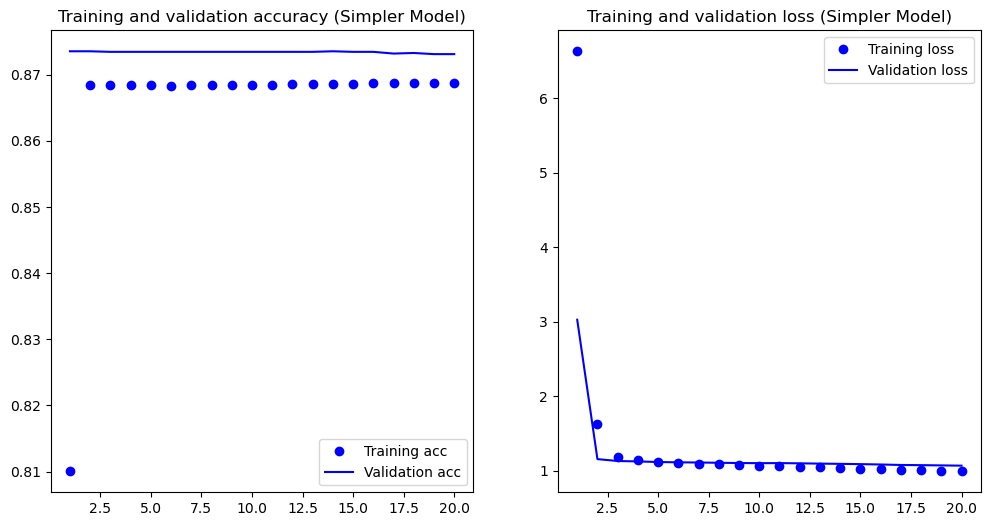

In [14]:
# Define a simpler model
simpler_model = Sequential([
    Embedding(input_dim=vocab_size, output_dim=256, input_length=max_length),  # Reduced embedding dimension
    SpatialDropout1D(0.2),
    LSTM(128, return_sequences=True),  # Single LSTM layer with fewer units
    Dropout(0.5),
    TimeDistributed(Dense(vocab_size, activation='softmax'))
])

simpler_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the simpler model
simpler_history = simpler_model.fit(X_train, y_train, batch_size=64, epochs=20, validation_data=(X_test, y_test))

# Save the simpler model
simpler_model.save('hinglish_to_english_translation_model_simpler.h5')

# Plot training history for the simpler model
def plot_training_history_simple(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs = range(1, len(acc) + 1)
    
    plt.figure(figsize=(12, 6))
    
    plt.subplot(1, 2, 1)
    plt.plot(epochs, acc, 'bo', label='Training acc')
    plt.plot(epochs, val_acc, 'b', label='Validation acc')
    plt.title('Training and validation accuracy (Simpler Model)')
    plt.legend()
    
    plt.subplot(1, 2, 2)
    plt.plot(epochs, loss, 'bo', label='Training loss')
    plt.plot(epochs, val_loss, 'b', label='Validation loss')
    plt.title('Training and validation loss (Simpler Model)')
    plt.legend()
    
    plt.show()

plot_training_history_simple(simpler_history)

In [6]:
# Load the data
data = pd.read_csv("hinglish_sentences.csv")

# Ensure that the text columns are strings and fill any NaNs with a placeholder string, e.g., ''
data['Hinglish'] = data['Hinglish'].fillna('').astype(str)
data['preprocessed_text'] = data['preprocessed_text'].fillna('').astype(str)

# Use Hinglish sentences as input and English sentences as output
input_sentences = data['Hinglish']
output_sentences = data['preprocessed_text']

# Tokenization
tokenizer = Tokenizer()
tokenizer.fit_on_texts(list(input_sentences) + list(output_sentences))
input_sequences = tokenizer.texts_to_sequences(input_sentences)
output_sequences = tokenizer.texts_to_sequences(output_sentences)

# Find the maximum sequence length for padding
max_length = max(max(len(seq) for seq in input_sequences), max(len(seq) for seq in output_sequences))
vocab_size = len(tokenizer.word_index) + 1

# Padding sequences
input_padded = pad_sequences(input_sequences, maxlen=max_length, padding='post')
output_padded = pad_sequences(output_sequences, maxlen=max_length, padding='post')

# Splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(input_padded, output_padded, test_size=0.2, random_state=42)

# Model building with added complexity
model = Sequential([
    Embedding(input_dim=vocab_size, output_dim=512, input_length=max_length),
    SpatialDropout1D(0.2),
    Bidirectional(LSTM(256, return_sequences=True)),
    Dropout(0.5),
    TimeDistributed(Dense(vocab_size, activation='softmax'))
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Training the model with increased epochs
history = model.fit(X_train, y_train, batch_size=64, epochs=20, validation_data=(X_test, y_test))

# To save the model for future use
model.save('hinglish_to_english_translation_model_improved.h5')


Epoch 1/20
25/25 [==============================] - 22s 747ms/step - loss: 3.2049 - accuracy: 0.8333 - val_loss: 1.1918 - val_accuracy: 0.8735
Epoch 2/20
25/25 [==============================] - 22s 873ms/step - loss: 1.1349 - accuracy: 0.8684 - val_loss: 1.0676 - val_accuracy: 0.8735
Epoch 3/20
25/25 [==============================] - 23s 910ms/step - loss: 1.0400 - accuracy: 0.8685 - val_loss: 1.0533 - val_accuracy: 0.8735
Epoch 4/20
25/25 [==============================] - 24s 935ms/step - loss: 1.0090 - accuracy: 0.8685 - val_loss: 1.0514 - val_accuracy: 0.8735
Epoch 5/20
25/25 [==============================] - 21s 821ms/step - loss: 0.9940 - accuracy: 0.8685 - val_loss: 1.0570 - val_accuracy: 0.8735
Epoch 6/20
25/25 [==============================] - 19s 765ms/step - loss: 0.9848 - accuracy: 0.8684 - val_loss: 1.0631 - val_accuracy: 0.8735
Epoch 7/20
25/25 [==============================] - 20s 804ms/step - loss: 0.9787 - accuracy: 0.8685 - val_loss: 1.0706 - val_accuracy: 0.8734

/Users/apple/anaconda3/lib/python3.11/site-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


NameError: name 'plt' is not defined

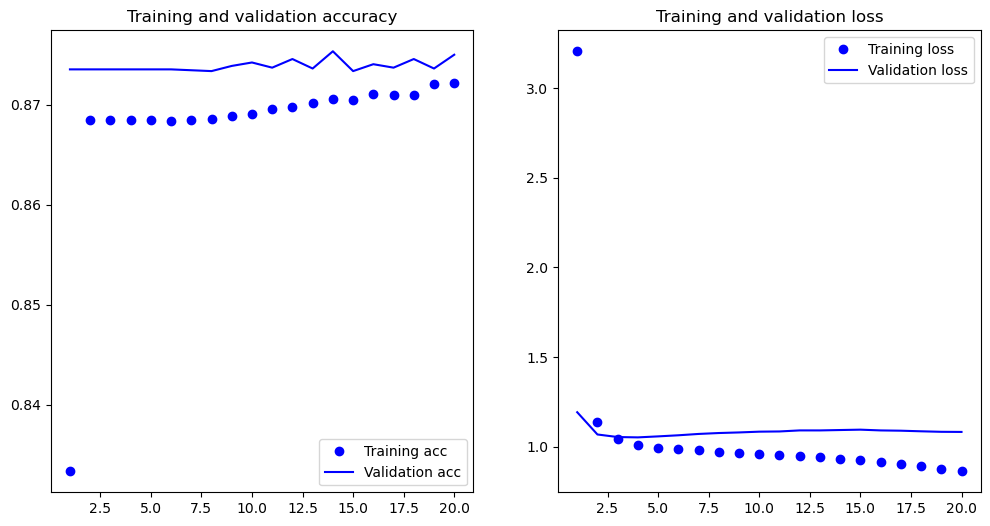

In [8]:
# Plot training history
def plot_training_history(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs = range(1, len(acc) + 1)
    
    plt.figure(figsize=(12, 6))
    
    plt.subplot(1, 2, 1)
    plt.plot(epochs, acc, 'bo', label='Training acc')
    plt.plot(epochs, val_acc, 'b', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()
    
    plt.subplot(1, 2, 2)
    plt.plot(epochs, loss, 'bo', label='Training loss')
    plt.plot(epochs, val_loss, 'b', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()
    
    plt.show()

plot_training_history(history)


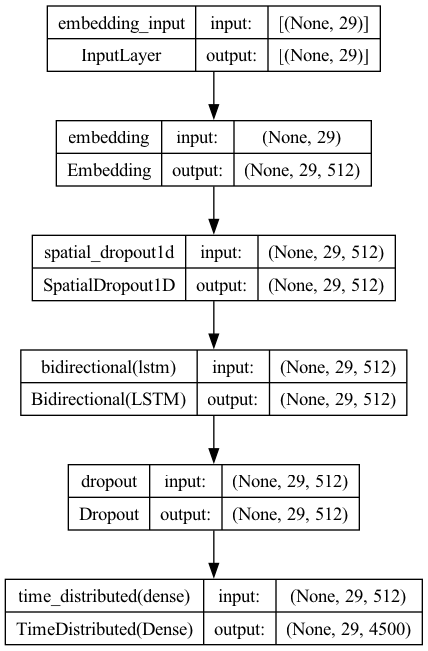

In [9]:
from tensorflow.keras.utils import plot_model

# Assuming 'model' is your trained model
plot_model(model, to_file='initial_model.png', show_shapes=True, show_layer_names=True)

In [10]:
# Load the data
data = pd.read_csv("hinglish_sentences.csv")

# Ensure that the text columns are strings and fill any NaNs with a placeholder string, e.g., ''
data['Hinglish'] = data['Hinglish'].fillna('').astype(str)
data['preprocessed_text'] = data['preprocessed_text'].fillna('').astype(str)

# Use Hinglish sentences as input and English sentences as output
input_sentences = data['Hinglish']
output_sentences = data['preprocessed_text']

# Tokenization
tokenizer = Tokenizer()
tokenizer.fit_on_texts(list(input_sentences) + list(output_sentences))
input_sequences = tokenizer.texts_to_sequences(input_sentences)
output_sequences = tokenizer.texts_to_sequences(output_sentences)

# Find the maximum sequence length for padding
max_length = max(max(len(seq) for seq in input_sequences), max(len(seq) for seq in output_sequences))
vocab_size = len(tokenizer.word_index) + 1

# Padding sequences
input_padded = pad_sequences(input_sequences, maxlen=max_length, padding='post')
output_padded = pad_sequences(output_sequences, maxlen=max_length, padding='post')

# Early Stopping to prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=3, verbose=1, mode='min', restore_best_weights=True)

# Reduce learning rate when a metric has stopped improving
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=2, min_lr=0.001, mode='min', verbose=1)

# Splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(input_padded, output_padded, test_size=0.2, random_state=42)

# Model building with added complexity
model = Sequential([
    Embedding(input_dim=vocab_size, output_dim=512, input_length=max_length),
    SpatialDropout1D(0.2),
    Bidirectional(LSTM(256, return_sequences=True)),
    Dropout(0.5),
    TimeDistributed(Dense(vocab_size, activation='softmax'))
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Training the model with increased epochs
history = model.fit(
    X_train, 
    np.expand_dims(y_train, -1),  # Ensuring y_train is properly expanded for sparse_categorical_crossentropy
    batch_size=64, 
    epochs=20, 
    validation_data=(X_test, np.expand_dims(y_test, -1)),  # Same for y_test
    callbacks=[early_stopping, reduce_lr]
)

# To save the model for future use
model.save('hinglish_to_english_translation_model_improved.h5')

Epoch 1/20
25/25 [==============================] - 20s 704ms/step - loss: 3.2597 - accuracy: 0.8338 - val_loss: 1.1934 - val_accuracy: 0.8735 - lr: 0.0010
Epoch 2/20
25/25 [==============================] - 18s 740ms/step - loss: 1.1421 - accuracy: 0.8685 - val_loss: 1.0695 - val_accuracy: 0.8735 - lr: 0.0010
Epoch 3/20
25/25 [==============================] - 17s 682ms/step - loss: 1.0391 - accuracy: 0.8685 - val_loss: 1.0537 - val_accuracy: 0.8735 - lr: 0.0010
Epoch 4/20
25/25 [==============================] - 20s 788ms/step - loss: 1.0113 - accuracy: 0.8685 - val_loss: 1.0507 - val_accuracy: 0.8735 - lr: 0.0010
Epoch 5/20
25/25 [==============================] - 17s 695ms/step - loss: 0.9936 - accuracy: 0.8685 - val_loss: 1.0566 - val_accuracy: 0.8735 - lr: 0.0010
Epoch 6/20
25/25 [==============================] - 19s 758ms/step - loss: 0.9820 - accuracy: 0.8685 - val_loss: 1.0617 - val_accuracy: 0.8735 - lr: 0.0010
Epoch 7/20
25/25 [==============================] - 19s 744ms/st

/Users/apple/anaconda3/lib/python3.11/site-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


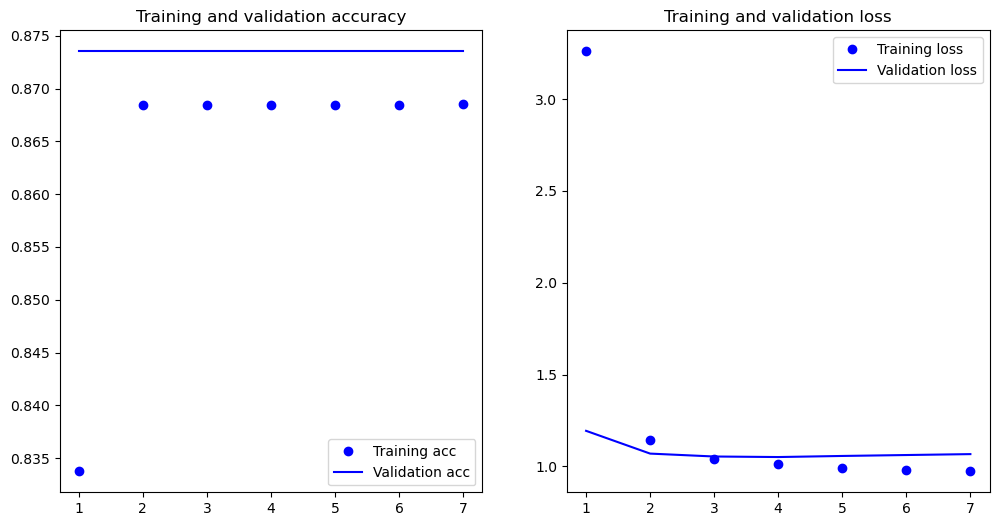

In [11]:
# Plot training history
def plot_training_history(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs = range(1, len(acc) + 1)
    
    plt.figure(figsize=(12, 6))
    
    plt.subplot(1, 2, 1)
    plt.plot(epochs, acc, 'bo', label='Training acc')
    plt.plot(epochs, val_acc, 'b', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()
    
    plt.subplot(1, 2, 2)
    plt.plot(epochs, loss, 'bo', label='Training loss')
    plt.plot(epochs, val_loss, 'b', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()
    
    plt.show()

plot_training_history(history)

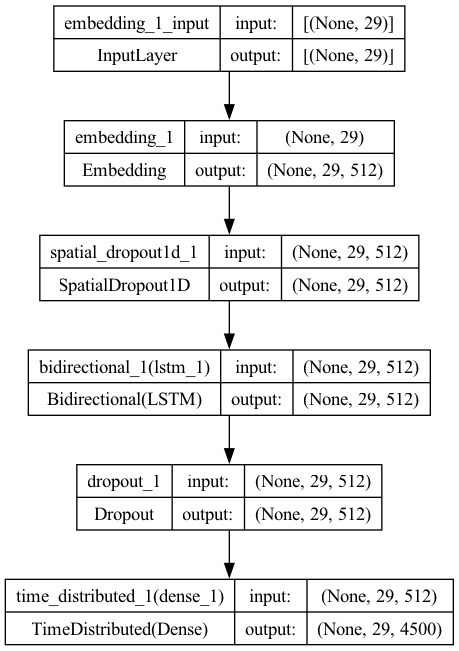

In [13]:
from tensorflow.keras.utils import plot_model

# Assuming 'model' is your trained model
plot_model(model, to_file='improved.png', show_shapes=True, show_layer_names=True)

In [16]:
from tensorflow.keras.layers import Input, Conv1D, GlobalMaxPooling1D, MaxPooling1D, Flatten, Dense
from tensorflow.keras.models import Model

def build_cnn_model(input_shape, vocab_size):
    input_layer = Input(shape=(input_shape,))
    x = Embedding(input_dim=vocab_size, output_dim=256)(input_layer)
    x = Conv1D(filters=128, kernel_size=3, padding='same', activation='relu')(x)
    x = MaxPooling1D(pool_size=2)(x)
    x = Conv1D(filters=64, kernel_size=3, padding='same', activation='relu')(x)
    x = Flatten()(x)  # Note: Flatten before Dense layer for classification, not suitable for seq2seq model directly.
    x = Dense(256, activation='relu')(x)
    output_layer = Dense(vocab_size, activation='softmax')(x)
    
    model = Model(inputs=input_layer, outputs=output_layer)
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

# Adjust input and output shape handling as per your task's requirement
input_shape = X_train.shape[1]  # e.g., max sequence length
cnn_model = build_cnn_model(input_shape, vocab_size)

# Training the CNN model (adapt as needed)
cnn_history = cnn_model.fit(X_train, np.expand_dims(y_train, -1), batch_size=64, epochs=20, 
                            validation_data=(X_test, np.expand_dims(y_test, -1)))

# Ensure y_train and y_test are correctly shaped for sparse_categorical_crossentropy
# They should have an extra dimension, thus use np.expand_dims(y_train, -1) during training and validation

Epoch 1/20


ValueError: in user code:

    File "/Users/apple/anaconda3/lib/python3.11/site-packages/keras/src/engine/training.py", line 1377, in train_function  *
        return step_function(self, iterator)
    File "/Users/apple/anaconda3/lib/python3.11/site-packages/keras/src/engine/training.py", line 1360, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/Users/apple/anaconda3/lib/python3.11/site-packages/keras/src/engine/training.py", line 1349, in run_step  **
        outputs = model.train_step(data)
    File "/Users/apple/anaconda3/lib/python3.11/site-packages/keras/src/engine/training.py", line 1127, in train_step
        loss = self.compute_loss(x, y, y_pred, sample_weight)
    File "/Users/apple/anaconda3/lib/python3.11/site-packages/keras/src/engine/training.py", line 1185, in compute_loss
        return self.compiled_loss(
    File "/Users/apple/anaconda3/lib/python3.11/site-packages/keras/src/engine/compile_utils.py", line 277, in __call__
        loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    File "/Users/apple/anaconda3/lib/python3.11/site-packages/keras/src/losses.py", line 143, in __call__
        losses = call_fn(y_true, y_pred)
    File "/Users/apple/anaconda3/lib/python3.11/site-packages/keras/src/losses.py", line 270, in call  **
        return ag_fn(y_true, y_pred, **self._fn_kwargs)
    File "/Users/apple/anaconda3/lib/python3.11/site-packages/keras/src/losses.py", line 2454, in sparse_categorical_crossentropy
        return backend.sparse_categorical_crossentropy(
    File "/Users/apple/anaconda3/lib/python3.11/site-packages/keras/src/backend.py", line 5777, in sparse_categorical_crossentropy
        res = tf.nn.sparse_softmax_cross_entropy_with_logits(

    ValueError: `labels.shape` must equal `logits.shape` except for the last dimension. Received: labels.shape=(1856,) and logits.shape=(64, 4500)
